**Author:** Josh Pickel  
**Date:** 11/23/19  
**Assignment:** Programming Assignment 6  
**Course:** CPTS 215, Fall 2019  
**Description:** This program reads files containing actor I.D's and names, movie I.D's and names, and movie I.D's to actor I.D's and maps each actor I.D. to thier name, each movie I.D. to thier name, and then maps each actor to what movie they appeared in. Then the program builds a graph connecting all actors together via the movie they appeared in. That graph is then ran though a BFS algorithm, building a shortest path graph to Kevin Bacon.

## The Process Of Making The Kevin Bacon Game  

### Reading in the files  and mapping I.D.'s to names
The first step in order to make the Kevin Bacon game is to map the movie names to the actors that appeared in that movie. I used dictionaries using three seperate functions to achieve this. The fist function mapped the acotr's I.D.'s to the actor's names. The second function mapped the movie's I.D.'s to the movie's names. The final function mapped movie names to all of the actors that appeared in that movie. The outputs are demonstrated below with the smaller actor and movie files.  

#### Mapping Actor I.D. to Actor Name:


In [1]:
from Kevin_Bacon import actor_name

actors = actor_name('actorsTest.txt')
actors

{'1': 'Kevin Bacon',
 '100': 'actor1',
 '200': 'actor2',
 '300': 'actor3',
 '400': 'actor4',
 '500': 'actor5',
 '600': 'actor6'}

#### Mapping Movie I.D. to Movie Name

In [2]:
from Kevin_Bacon import movie_names

movies = movie_names('moviesTest.txt')
movies

{'10': 'movie1',
 '20': 'movie2',
 '30': 'movie3',
 '40': 'movie4',
 '50': 'movie5'}

#### Mapping Movie Names to All Actors in The Movie

In [3]:
from Kevin_Bacon import movie_actors

movie_to_actors = movie_actors('movie-actorsTest.txt',actors,movies)
movie_to_actors

{'movie1': ['Kevin Bacon', 'actor1', 'actor2'],
 'movie2': ['actor1', 'actor3'],
 'movie3': ['actor3', 'actor2'],
 'movie4': ['actor3', 'actor4'],
 'movie5': ['actor5', 'actor6']}

### Using The File Data  
Now that the file data has been put in a format I can work with, I then made a function to make all possible ege combinations to build my graph. This was achieved through two functions, one that built the pair combinations, and the other that built the edges by calling on the pair making function. The output is demonstrated below using the smaller data set.



In [4]:
from Kevin_Bacon import make_edges
from Kevin_Bacon import pair_maker

edges = make_edges(movie_to_actors)
edges

[('Kevin Bacon', 'actor1', 'movie1'),
 ('Kevin Bacon', 'actor2', 'movie1'),
 ('actor1', 'actor2', 'movie1'),
 ('actor1', 'actor3', 'movie2'),
 ('actor3', 'actor2', 'movie3'),
 ('actor3', 'actor4', 'movie4'),
 ('actor5', 'actor6', 'movie5')]

### Building The Graph
Since all of the edge combinations have been made with the data, it's time to build the graph! I did this though a function that adds all of the above edges to a graph, and returns the graph object.

In [5]:
from Kevin_Bacon import graph_builder

g = graph_builder(edges)
g

### Building The Shortest Path Graph  

With the graph already built, it is time to make a shorest path graph through a breadth-first search algorithm that will be used to in the game. 


In [6]:
from Kevin_Bacon import bfs

t = bfs(g,g.get_vertex('Kevin Bacon'))


### Searching the BFS

With the BFS built, I then made a function to search the BFS graph to print the shortest path from the actor the user provides to Kevin Bacon, printing the results along the way. I also created a function to find statistics on the graph, and I stored all actor's Bacon numbers in a dictionary in this function. To have the Bacon number printed before the path listing, I leveraged the insight function to find the actor's Bacon number before printing the path. This was done in the main function.   

**Note: For viewing purposes, click on the below cell and go to 'Cell' > 'All Ouptput' > 'Toggle Scroll' at the top of the page.**

actor3 Appeared in movie2, with actor1
actor1 Appeared in movie1, with Kevin Bacon


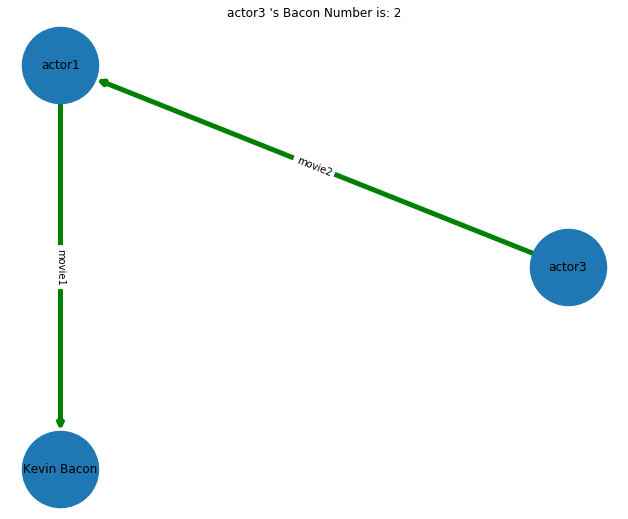

In [7]:
from Kevin_Bacon import find_path

path = find_path('actor3',t)


### Getting Insight

I will show the insight I got from my insight function on the graph.

In [8]:
from Kevin_Bacon import insight 
Stats = insight(actors,t)
print("Here are some interesting statistics about the Kevin Bacon Graph: ")
print("An actor with the highest Bacon number is %s with a Bacon number of: %i" %(Stats[0],Stats[1]))
print("There are %i actors who have a Bacon number of 1!" %(Stats[2]))

Here are some interesting statistics about the Kevin Bacon Graph: 
An actor with the highest Bacon number is actor4 with a Bacon number of: 3
There are 2 actors who have a Bacon number of 1!


## Now Let's Play The Game With the Big Data Set!  

**Note: For viewing purposes, click on the below cell and go to 'Cell' > 'All Ouptput' > 'Toggle Scroll' at the top of the page.**

In [ ]:
from Kevin_Bacon import*
main()

Here are some interesting statistics about the Kevin Bacon Graph: 
An actor with the highest Bacon number is Richard Arlen with a Bacon number of: 8
There are 80 actors who have a Bacon number of 1!


When you would like to quit, please enter 'Q' or 'q' in to prompt box
You can type an actor's name in upper or lowercase, or a combination of the two.
Ex: 'Tom cruise', 'Tom Cruise' , 'TOm CruIse' 
 
